MovieWriter ffmpeg unavailable; using Pillow instead.


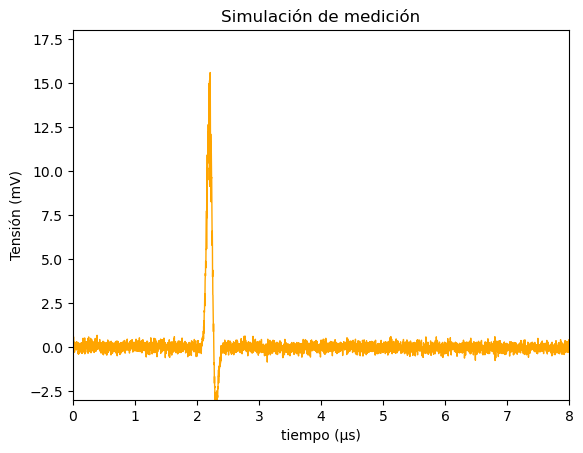

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.stats import betaprime

# Paso 1: Definir el pulso
def pulso(t, t0, sigma, omega, epsilon=1e-10):
    gauss = np.exp(-(t - t0)**2 / (2 * sigma**2))
    seno = np.cos(omega * (t - t0 + sigma))
    S = gauss * seno
    integral_S = np.trapz(S, t)
    if integral_S < epsilon:
        A = 0
    else:
        A = 1 / integral_S
    return A * S

# Paso 2: Simulación de una medición
def simular_medicion(t, t0s, probs, sigma0=0.05, sigma_sigma=0.005, omega0=5*np.pi, sigma_omega=0.05):
    señal = np.zeros_like(t)
    for t0, p in zip(t0s, probs):
        if np.random.rand() < p:
            x = betaprime.rvs(a=4, b=2)
            t_centro = t0 + (x - 4 / 2) * 0.15
            sigma = np.random.normal(sigma0, sigma_sigma)
            omega = np.random.normal(omega0, sigma_omega)
            señal += pulso(t, t_centro, sigma, omega)
    ruido_rel = np.random.normal(1, 0.1, size=t.shape)
    ruido_abs = np.random.normal(0, 0.2, size=t.shape)
    fondo = (-t + 2) / 100
    return señal * ruido_rel + ruido_abs + fondo

# Paso 3: Rutina para N mediciones
def simular_N_mediciones(N, t, t0s, probs):
    return np.array([simular_medicion(t, t0s, probs) for _ in range(N)])

# Tiempo para simulación
t = np.linspace(0, 8, 4000)
t0s = [1.8, 2.8, 5]
probs = [0.3, 0.1, 0.6]

# Simular animación: 50 mediciones
mediciones = simular_N_mediciones(100, t, t0s, probs)

# Crear animación
fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
background = ax.fill_between(t, -3, 18, color='white', alpha=1)
ax.set_xlim(0, 8)
ax.set_ylim(-3, 18)
ax.set_xlabel('tiempo (μs)')
ax.set_ylabel('Tensión (mV)')
ax.set_title('Simulación de medición')
line = line, = ax.plot([], [], lw=1, color='orange')

def update(frame):
    line.set_data(t, mediciones[frame])
    return line,

ani = FuncAnimation(fig, update, frames=len(mediciones), blit=True)
ani.save(r'D:\Documents\Downloads\simulacion_medicion.gif', fps=5 , dpi=80)




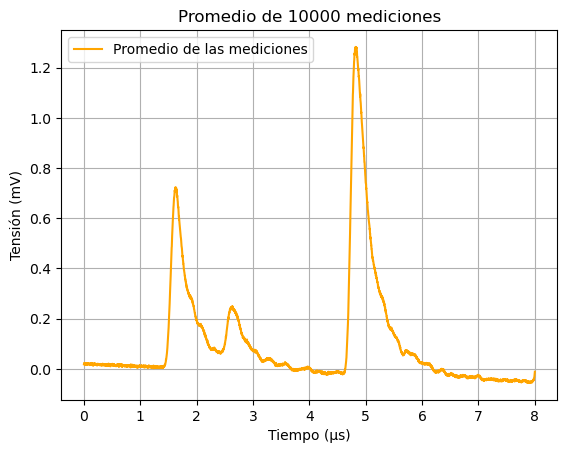

In [9]:
# Calcular el promedio de las mediciones
def promedio_mediciones(N, t, t0s, probs):
    mediciones = simular_N_mediciones(N, t, t0s, probs)
    promedio = np.mean(mediciones, axis=0)
    return promedio


# Simular N mediciones y calcular el promedio
N = 10000 # Puedes ajustar el valor de N para obtener más o menos mediciones
promedio = promedio_mediciones(N, t, t0s, probs)

# Crear gráfico del promedio
plt.plot(t, promedio, label="Promedio de las mediciones", color='orange')
plt.xlabel('Tiempo (μs)')
plt.ylabel('Tensión (mV)')
plt.title(f'Promedio de {N} mediciones')
plt.grid(True)
plt.legend()
plt.show()
